In [50]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


### Exploratory Data Analysis

In [51]:
# read dataset

df = pd.read_csv('../datasets/Salary_Data.csv')

df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [52]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [54]:
df.isna().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

### Preprocessing

In [55]:
# clean data
df_cleaned = df.dropna()
df_cleaned

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [56]:
print(f"Rows before cleaning: {len(df)}")
print(f"Rows after cleaning: {len(df_cleaned)}")

Rows before cleaning: 6704
Rows after cleaning: 6698


### Model Training using Linear Regression

In [57]:
X = df_cleaned[['Years of Experience']]
y = df_cleaned['Salary']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choose model Linear Regression
model = LinearRegression()

# fit model on training data
model.fit(X_train, y_train)

# predict on test set
y_predict = model.predict(X_test)


# Evaluate
r2 = r2_score(y_test, y_predict)
print(f"R2 score on test data: {r2: .4f}")
# show model equation
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")



R2 score on test data:  0.6556
Intercept: 58196.21064922618
Coefficient: 7072.861686708129


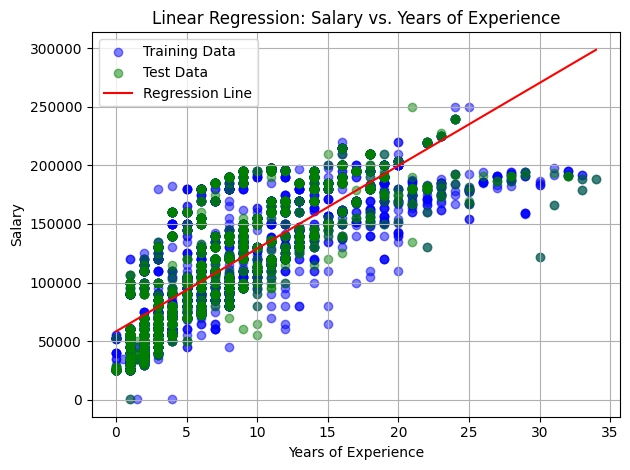

In [58]:
# visualize results of X (not the X test set)

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Training Data', alpha=0.5)

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)

# Plot regression line (based on training data)
# Sort X_train for a smoother line
X_line = sorted(X_train.values.flatten())

# convert to dataframe with correct column name
X_line_df = pd.DataFrame(X_line, columns=['Years of Experience'])

y_line = model.predict(X_line_df)

plt.plot(X_line, y_line, color='red', label='Regression Line')

# Labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Predict Salary of a New Input

In [59]:
year_input = int(input("enter yo year ho: "))

new_experience = pd.DataFrame({'Years of Experience': [year_input]})
predicted_salary = model.predict(new_experience)

print(f"Predicted Salary for {year_input} years of experience: ${predicted_salary[0]:,.2f}")

Predicted Salary for 7 years of experience: $107,706.24
